<h1 align="center">Computational Methods in Environmental Engineering</h1>
<h2 align="center">Lecture #15</h2>
<h3 align="center">20 Apr 2023</h3>



## When pandas is not enough



<center><img src="https://www.seekpng.com/png/full/70-702245_images-dataset-diagram-logo-xarray-python.png"></center>



## xarray



-   `xarray` is `pandas` and `numpy` on steroids!
-   Labels in the form of dimensions, coordinates and attributes
-   Inspired by `pandas` but also integrates with `numpy`



In [1]:
%conda install xarray netcdf4 -c conda-forge -y

Retrieving notices: ...working... done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.3.1



## Package Plan ##

  environment location: /opt/homebrew/Caskroom/miniforge/base/envs/ce597

  added / updated specs:
    - netcdf4
    - xarray


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    xarray-2023.4.2            |     pyhd8ed1ab_0         649 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         649 KB

The following packages will be UPDATED:

  xarray                                0.19.0-pyhd8ed1ab_1 --> 2023.4.2-pyhd8ed1ab_0 



            

## xarray data structures



-   `DataArray` is a labeled, multi-dimensional array
    
    -   `values`: a numpy array holding the values
    -   `dims`: dimension names
    -   `coords`: a dict-like container of arrays with labels for each point
    -   `attrs`: arbitrary metadata
    
    -   `Dataset` is `xarray` equivalent to a `DataFrame`
        -   `data_vars`: a dict-like container of `DataArray` objects



## Create a DataArray



Let's import the modules



In [2]:
import numpy as np
import pandas as pd
import xarray as xr

The constructor takes either a numpy array or a Series/DataFrame



In [3]:
xr.DataArray(np.arange(6).reshape((2, 3)))

<xarray.DataArray (dim_0: 2, dim_1: 3)>
array([[0, 1, 2],
       [3, 4, 5]])
Dimensions without coordinates: dim_0, dim_1

In [4]:
data = xr.DataArray(np.random.randn(2, 3), coords={'x': ['a', 'b']}, dims=('x', 'y'))
data

<xarray.DataArray (x: 2, y: 3)>
array([[-0.5188915 ,  0.66957948, -1.42175304],
       [ 0.12092303,  0.16617789,  0.28924386]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y

In [5]:
xr.DataArray(pd.Series(range(3), index=list('abc'), name='foo'))

<xarray.DataArray 'foo' (dim_0: 3)>
array([0, 1, 2])
Coordinates:
  * dim_0    (dim_0) object 'a' 'b' 'c'

## Indexing



Four kinds of indexing are supported by `xarray`

Positional and by integer label (like numpy)



In [6]:
data[0, 1]

<xarray.DataArray ()>
array(0.66957948)
Coordinates:
    x        <U1 'a'

Positional and by coordinate label (like pandas)



In [7]:
data.loc['a':'b']

<xarray.DataArray (x: 2, y: 3)>
array([[-0.5188915 ,  0.66957948, -1.42175304],
       [ 0.12092303,  0.16617789,  0.28924386]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y

By dimension name and integer label



In [8]:
data.isel(x=slice(2))

<xarray.DataArray (x: 2, y: 3)>
array([[-0.5188915 ,  0.66957948, -1.42175304],
       [ 0.12092303,  0.16617789,  0.28924386]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y

By dimension name and coordinate label



In [9]:
data.sel(x=['a', 'b'])

<xarray.DataArray (x: 2, y: 3)>
array([[-0.5188915 ,  0.66957948, -1.42175304],
       [ 0.12092303,  0.16617789,  0.28924386]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y

## Computation



Numpy operations work the way we expect them to



In [10]:
(data + 10).sum()

<xarray.DataArray ()>
array(59.30527972)

In [11]:
np.sin(data.T)

<xarray.DataArray (y: 3, x: 2)>
array([[-0.49591785,  0.12062855],
       [ 0.62065632,  0.16541411],
       [-0.9889136 ,  0.28522757]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y

Aggregate operations can use dimension names



In [12]:
data.mean(dim='x')

<xarray.DataArray (y: 3)>
array([-0.19898423,  0.41787868, -0.56625459])
Dimensions without coordinates: y

Arithmetic operations broadcast based on dimension name



In [13]:
a = xr.DataArray(np.arange(4, 7), [data.coords['y']])
a

<xarray.DataArray (y: 3)>
array([4, 5, 6])
Coordinates:
  * y        (y) int64 0 1 2

In [14]:
b = xr.DataArray(np.arange(9, 13), dims='z')
b

<xarray.DataArray (z: 4)>
array([ 9, 10, 11, 12])
Dimensions without coordinates: z

In [15]:
a + b

<xarray.DataArray (y: 3, z: 4)>
array([[13, 14, 15, 16],
       [14, 15, 16, 17],
       [15, 16, 17, 18]])
Coordinates:
  * y        (y) int64 0 1 2
Dimensions without coordinates: z

## Groupby



Grouped operations are supported



In [16]:
labels = xr.DataArray(['E', 'F', 'E'], [data.coords['y']], name='labels')
labels

<xarray.DataArray 'labels' (y: 3)>
array(['E', 'F', 'E'], dtype='<U1')
Coordinates:
  * y        (y) int64 0 1 2

In [17]:
data.groupby(labels).mean('y')

<xarray.DataArray (x: 2, labels: 2)>
array([[-0.97032227,  0.66957948],
       [ 0.20508345,  0.16617789]])
Coordinates:
  * x        (x) <U1 'a' 'b'
  * labels   (labels) object 'E' 'F'

In [18]:
data.groupby(labels).apply(lambda x: x - x.min())

<xarray.DataArray (x: 2, y: 3)>
array([[0.90286154, 0.50340158, 0.        ],
       [1.54267608, 0.        , 1.7109969 ]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y

## pandas



Can easily convert to and from `pandas` objects



In [19]:
series = data.to_series()
series

x  y
a  0   -0.518891
   1    0.669579
   2   -1.421753
b  0    0.120923
   1    0.166178
   2    0.289244
dtype: float64

In [20]:
series.to_xarray()

<xarray.DataArray (x: 2, y: 3)>
array([[-0.5188915 ,  0.66957948, -1.42175304],
       [ 0.12092303,  0.16617789,  0.28924386]])
Coordinates:
  * x        (x) object 'a' 'b'
  * y        (y) int64 0 1 2

## Datasets



Generalization of `DataArray` objects



In [21]:
# ds = xr.Dataset({'foo': data, 'bar': ('x', [1, 2]), 'baz': np.pi})
ds = xr.Dataset(dict(foo=data, bar=('x', [1, 2]), baz=np.pi))
ds

<xarray.Dataset>
Dimensions:  (x: 2, y: 3)
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y
Data variables:
    foo      (x, y) float64 -0.5189 0.6696 -1.422 0.1209 0.1662 0.2892
    bar      (x) int64 1 2
    baz      float64 3.142

Can access them as with dictionaries



In [22]:
# ds['foo']
ds.foo

<xarray.DataArray 'foo' (x: 2, y: 3)>
array([[-0.5188915 ,  0.66957948, -1.42175304],
       [ 0.12092303,  0.16617789,  0.28924386]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y

## NetCDF



Recommended way of writing `xarray` objects to disk



In [23]:
ds.to_netcdf('../data/examplexr.nc')
xr.open_dataset('../data/examplexr.nc')

<xarray.Dataset>
Dimensions:  (x: 2, y: 3)
Coordinates:
  * x        (x) object 'a' 'b'
Dimensions without coordinates: y
Data variables:
    foo      (x, y) float64 ...
    bar      (x) int64 ...
    baz      float64 ...

## ☛ Hands-on exercise



Let's grab some data from the NCEP Reanalysis. Before we start ensure you have installed `netCDF4`!

[https://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.derived.surfaceflux.html](https://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.derived.surfaceflux.html)

-   We can download the entire dataset but if we don't want the entire globe?
-   We will use the Opendap protocol

[https://www.esrl.noaa.gov/psd/thredds/catalog/Datasets/ncep.reanalysis.derived/surface_gauss/catalog.html](https://www.esrl.noaa.gov/psd/thredds/catalog/Datasets/ncep.reanalysis.derived/surface_gauss/catalog.html)



In [24]:
url = "http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface_gauss/tmax.2m.mon.mean.nc"
ds = xr.open_dataarray(url)
ds

<xarray.DataArray 'tmax' (time: 903, lat: 94, lon: 192)>
[16297344 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2023-03-01
Attributes: (12/13)
    long_name:     Monthly Mean Maximum Temperature at 2 m
    units:         degK
    precision:     2
    GRIB_id:       15
    GRIB_name:     T MAX
    var_desc:      Maximum Temperature
    ...            ...
    statistic:     Mean
    parent_stat:   Daily Maximum
    valid_range:   [150. 400.]
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [192.95999 325.18384]
    _ChunkSizes:   [  1  94 192]

Use the `sel` and/or `isel` methods to select data within a $10^{\circ} \times 10^{\circ}$ bounding box north of 40 degrees latitude



In [25]:
tmax = ds.sel(lat=slice(55, 45), lon=slice(100, 110))

Your data is not downloaded yet! Load them in



In [26]:
tmax = tmax.load()
tmax

<xarray.DataArray 'tmax' (time: 903, lat: 5, lon: 5)>
array([[[261.26   , 262.34   , 262.09   , 259.93   , 256.37   ],
        [256.86   , 259.9    , 261.91998, 261.28   , 258.24   ],
        [256.43   , 259.03   , 260.8    , 260.07   , 257.21   ],
        [258.62   , 260.81   , 261.37   , 259.41998, 256.09   ],
        [260.07   , 262.3    , 262.72998, 260.91   , 258.15   ]],

       [[261.02002, 262.45   , 262.84   , 261.03   , 258.     ],
        [257.74   , 260.8    , 263.18   , 262.91998, 260.16998],
        [258.25   , 260.8    , 263.03   , 262.89   , 260.16998],
        [260.94   , 263.15   , 264.32   , 262.99   , 260.15   ],
        [263.08002, 265.41   , 266.34   , 265.2    , 263.     ]],

       [[268.36   , 269.26   , 269.28998, 267.82   , 265.5    ],
        [266.85   , 269.28998, 270.93   , 270.28   , 267.86   ],
        [267.36   , 269.75   , 271.21   , 270.56   , 267.97   ],
        [268.77002, 270.94   , 271.63   , 270.1    , 267.4    ],
        [270.86   , 272.61   , 273.03998, 272.07   , 270.6    ]],

       ...,

       [[257.19034, 257.91617, 257.7645 , 255.91937, 252.94836],
        [254.27742, 257.09357, 259.25806, 259.02258, 256.5355 ],
        [255.2742 , 257.74194, 259.69675, 259.25165, 256.67743],
        [258.54193, 260.1968 , 260.55804, 258.51932, 255.50003],
        [259.95486, 261.51938, 261.3742 , 259.71936, 257.81613]],

       [[263.85355, 264.7821 , 264.70712, 263.03214, 260.66428],
        [261.41428, 263.97495, 265.76074, 265.4679 , 263.55713],
        [262.13217, 264.18213, 265.83932, 265.58212, 263.62143],
        [265.32144, 266.71075, 267.11075, 265.56787, 263.23212],
        [267.7286 , 269.11786, 269.10718, 267.72858, 266.25003]],

       [[271.4806 , 272.87097, 273.0903 , 271.6839 , 269.67746],
        [269.43546, 272.1742 , 273.84842, 273.6645 , 271.49033],
        [269.89032, 272.05807, 273.6    , 273.10968, 271.10645],
        [272.02258, 273.8097 , 274.3355 , 272.89032, 270.9387 ],
        [274.25482, 276.30646, 277.03876, 276.1742 , 275.27737]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 54.28 52.38 50.48 48.57 46.67
  * lon      (lon) float32 101.2 103.1 105.0 106.9 108.8
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2023-03-01
Attributes: (12/13)
    long_name:     Monthly Mean Maximum Temperature at 2 m
    units:         degK
    precision:     2
    GRIB_id:       15
    GRIB_name:     T MAX
    var_desc:      Maximum Temperature
    ...            ...
    statistic:     Mean
    parent_stat:   Daily Maximum
    valid_range:   [150. 400.]
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [192.95999 325.18384]
    _ChunkSizes:   [  1  94 192]

### Load the corresponding minimum temperature data



In [27]:
tmin = xr.open_dataarray(url.replace('tmax', 'tmin')).sel(lat=slice(55, 45), lon=slice(100, 110)).load()

In [28]:
tmin

<xarray.DataArray 'tmin' (time: 903, lat: 5, lon: 5)>
array([[[253.15   , 254.98   , 254.78   , 252.1    , 247.58   ],
        [246.95   , 252.34   , 255.13   , 254.41   , 249.78   ],
        [245.14   , 250.75   , 253.08   , 251.91   , 248.14   ],
        [247.29   , 250.52   , 251.31999, 249.23   , 244.27   ],
        [247.08   , 249.83   , 250.65   , 247.98   , 245.35   ]],

       [[252.41   , 253.87   , 254.06   , 252.48   , 248.63   ],
        [246.56   , 250.45   , 253.18   , 253.41   , 250.12   ],
        [246.33   , 249.29   , 251.75   , 251.38   , 248.1    ],
        [247.34   , 250.66   , 252.37   , 249.73   , 245.4    ],
        [247.92   , 251.68   , 252.72   , 249.93   , 246.87   ]],

       [[255.24   , 257.9    , 258.83002, 257.03   , 252.73   ],
        [252.37   , 256.97   , 258.41   , 258.99   , 254.08   ],
        [252.13   , 256.12   , 258.41998, 257.1    , 252.70999],
        [253.34   , 257.27002, 258.34   , 255.91   , 251.02   ],
        [254.27   , 257.69   , 258.78   , 257.02002, 254.70999]],

       ...,

       [[250.86128, 251.84836, 251.52579, 249.47417, 246.09032],
        [246.71619, 250.3161 , 253.01291, 252.98386, 249.8129 ],
        [246.8258 , 250.07745, 252.73547, 252.28386, 249.50647],
        [248.5742 , 251.28065, 252.3129 , 250.3097 , 246.40967],
        [248.36772, 250.96135, 251.55486, 249.46773, 246.88708]],

       [[254.81787, 256.3643 , 256.4393 , 254.53214, 251.03214],
        [250.0714 , 253.85   , 257.2964 , 257.65002, 254.55359],
        [248.93933, 252.8857 , 256.07852, 255.92143, 253.59286],
        [252.0643 , 254.73213, 255.75357, 253.73572, 250.55   ],
        [254.52856, 256.53928, 256.38568, 254.02145, 251.8107 ]],

       [[260.6419 , 262.0387 , 262.59683, 261.08713, 258.3387 ],
        [256.13226, 259.5645 , 262.78067, 263.4516 , 261.23553],
        [255.81612, 258.99033, 261.42905, 261.34515, 260.1387 ],
        [257.97098, 260.39676, 261.56458, 259.79678, 257.29028],
        [259.10968, 261.53546, 262.15485, 260.72256, 259.00967]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 54.28 52.38 50.48 48.57 46.67
  * lon      (lon) float32 101.2 103.1 105.0 106.9 108.8
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2023-03-01
Attributes: (12/13)
    long_name:     Monthly Mean Minimum Temperature at 2 m
    units:         degK
    precision:     2
    GRIB_id:       16
    GRIB_name:     T MIN
    var_desc:      Minimum Temperature
    ...            ...
    statistic:     Mean
    parent_stat:   Daily Minimum
    valid_range:   [150. 400.]
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [182.95001 310.71   ]
    _ChunkSizes:   [  1  94 192]

### Construct a Dataset from the two DataArrays



In [29]:
data = xr.Dataset(dict(tmax=tmax, tmin=tmin))
data

<xarray.Dataset>
Dimensions:  (lat: 5, lon: 5, time: 903)
Coordinates:
  * lat      (lat) float32 54.28 52.38 50.48 48.57 46.67
  * lon      (lon) float32 101.2 103.1 105.0 106.9 108.8
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2023-03-01
Data variables:
    tmax     (time, lat, lon) float32 261.3 262.3 262.1 ... 277.0 276.2 275.3
    tmin     (time, lat, lon) float32 253.1 255.0 254.8 ... 262.2 260.7 259.0

### Calculate the temporal mean



From the Dataset you constructed, calculate the temporal mean for maximum temperature



In [30]:
data.tmax.mean(['lat', 'lon'])

<xarray.DataArray 'tmax' (time: 903)>
array([259.76797, 261.9948 , 269.6124 , 276.2456 , 279.798  , 291.3664 ,
       295.69562, 295.08478, 287.25323, 275.888  , 262.4808 , 260.41718,
       260.1228 , 263.2584 , 264.7644 , 273.4744 , 284.0944 , 291.5352 ,
       295.46838, 292.0156 , 286.7956 , 277.57843, 262.0628 , 251.00919,
       260.70242, 262.3    , 266.9896 , 271.008  , 284.714  , 293.8836 ,
       298.51642, 295.05478, 287.82083, 276.61478, 261.2072 , 260.16956,
       255.9788 , 258.77438, 265.8508 , 270.76678, 284.822  , 293.2916 ,
       295.696  , 293.11838, 286.73358, 278.42044, 266.31763, 262.36   ,
       259.53918, 256.616  , 266.7628 , 272.8176 , 284.10403, 292.8716 ,
       295.454  , 293.8172 , 286.0308 , 276.4512 , 260.2384 , 255.03879,
       257.3    , 260.53918, 269.4328 , 272.3312 , 282.3712 , 293.61923,
       295.61   , 293.9148 , 288.79962, 278.074  , 263.954  , 259.72882,
       257.77478, 260.722  , 265.92038, 272.536  , 280.3948 , 293.31638,
       296.01923, 296.4564 , 286.6244 , 277.4488 , 265.38638, 251.47   ,
       257.7088 , 259.77722, 264.99442, 271.9052 , 283.04678, 291.2096 ,
       296.2812 , 296.486  , 285.4372 , 276.8516 , 267.66437, 261.0968 ,
       255.22522, 256.954  , 265.8092 , 272.398  , 284.2224 , 292.00882,
       294.302  , 293.33362, 286.21042, 277.014  , 261.71518, 253.6932 ,
       254.9292 , 254.26   , 265.17078, 272.9416 , 281.802  , 292.18118,
       293.012  , 291.038  , 283.9996 , 277.74402, 266.1448 , 260.1196 ,
...
       294.97318, 294.0399 , 285.65747, 276.16785, 268.09372, 261.03665,
       259.3294 , 257.55286, 269.85175, 280.74677, 284.10193, 292.40344,
       294.8871 , 294.23468, 286.85388, 277.26282, 265.31265, 259.0075 ,
       260.3338 , 262.14297, 267.70993, 277.48093, 284.9644 , 292.90466,
       297.62427, 297.02878, 286.70056, 278.3231 , 263.18015, 261.35187,
       253.60736, 261.2895 , 269.48917, 276.70215, 283.94556, 292.97894,
       298.71976, 294.56888, 288.87628, 271.9982 , 262.9772 , 261.08798,
       257.53342, 262.96417, 269.8991 , 278.37253, 287.3701 , 296.13083,
       298.19122, 293.64066, 287.18774, 275.62994, 263.72214, 260.07962,
       253.72028, 258.75986, 270.79755, 277.2388 , 287.5743 , 293.96786,
       294.8591 , 295.1884 , 286.10226, 278.7684 , 264.56107, 254.4511 ,
       257.76773, 257.32312, 270.60904, 278.09656, 284.5805 , 294.60718,
       297.01675, 294.50528, 290.814  , 276.63382, 264.0424 , 258.86722,
       259.38696, 262.99518, 268.28427, 276.85962, 282.55225, 290.51706,
       295.26273, 292.5591 , 287.3516 , 272.99573, 266.18988, 255.56992,
       255.81215, 263.18256, 269.93405, 274.43906, 278.48013, 289.4172 ,
       295.679  , 293.22528, 286.2743 , 275.6102 , 266.55267, 259.8199 ,
       258.80646, 259.18527, 267.55148, 274.2436 , 284.5009 , 293.17828,
       294.2573 , 291.63022, 289.0636 , 277.11627, 266.20505, 257.1493 ,
       258.0107 , 265.05786, 272.88916], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2023-03-01

What happens if you use the `plot` method?



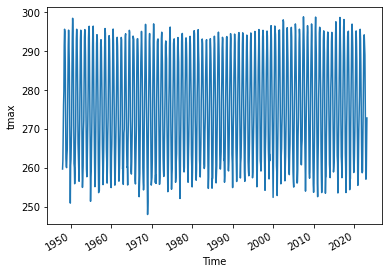

In [33]:
data.tmax.mean(['lat', 'lon']).plot()

### Convert spatial mean time series to a pandas DataFrame



After you've converted to a DataFrame, use `head`, `describe` to examine the data and then `sns.pairplot` to look at the relationship between minimum and maximum temperature



In [38]:
df = data.mean(['lat', 'lon']).to_dataframe()

In [39]:
df.head()

,tmax,tmin
time,,
1948-01-01,259.767975,250.149612
1948-02-01,261.994812,250.265579
1948-03-01,269.612396,255.895203
1948-04-01,276.245605,266.128021
1948-05-01,279.798004,269.153625


In [40]:
df.describe()

,tmax,tmin
count,903.000000,903.000000
mean,275.788116,264.272156
std,13.868122,13.597299
min,248.075195,236.692398
25%,262.535599,251.747681
50%,276.046417,263.948364
75%,289.344589,276.799866
max,298.885193,286.332397


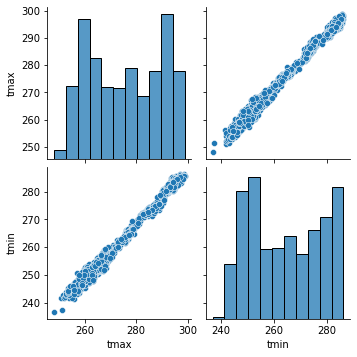

In [43]:
import seaborn as sns
sns.pairplot(df)

### Plot the probability of freezing by month for three locations



-   Calculate the freezing probability
-   Stack the DataArray to create the location coordinate
-   Select three locations and plot (Hint: look at the `to_pandas` method)



In [44]:
# select freezing as any month with an average minimum temperature below 273.15 K (0 deg C)
freeze = (data.tmin < 273.15).groupby('time.month').mean()
freeze

<xarray.DataArray 'tmin' (month: 12, lat: 5, lon: 5)>
array([[[1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ],
...
        [0.88      , 0.4       , 0.09333333, 0.21333333, 0.53333333],
        [0.66666667, 0.13333333, 0.02666667, 0.05333333, 0.04      ]],

       [[1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ]]])
Coordinates:
  * lat      (lat) float32 54.28 52.38 50.48 48.57 46.67
  * lon      (lon) float32 101.2 103.1 105.0 106.9 108.8
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [46]:
# combine lat/lon in a single dimension and select three of them
f3 = freeze.stack({'loc': ['lat', 'lon']}).isel(loc=slice(0, 3))
f3

<xarray.DataArray 'tmin' (month: 12, loc: 3)>
array([[1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [0.81333333, 0.4       , 0.29333333],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.38666667, 0.09333333, 0.05333333],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ]])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * loc      (loc) object MultiIndex
  * lat      (loc) float32 54.28 54.28 54.28
  * lon      (loc) float32 101.2 103.1 105.0

<AxesSubplot:xlabel='month'>

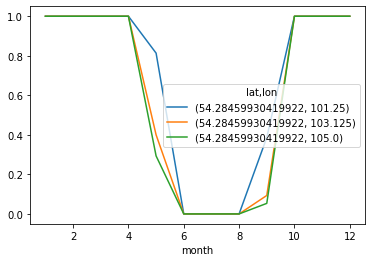

In [47]:
f3.to_pandas().plot()

### Calculate Tmax monthly anomalies and plot them



Plot spatial average as well as a map



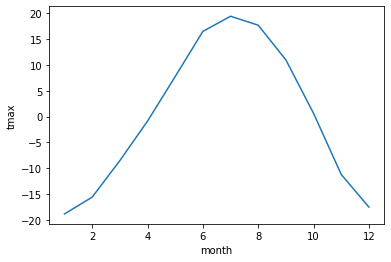

In [48]:
(data.tmax.groupby('time.month').mean() - data.tmax.mean('time')).mean(['lat', 'lon']).plot()

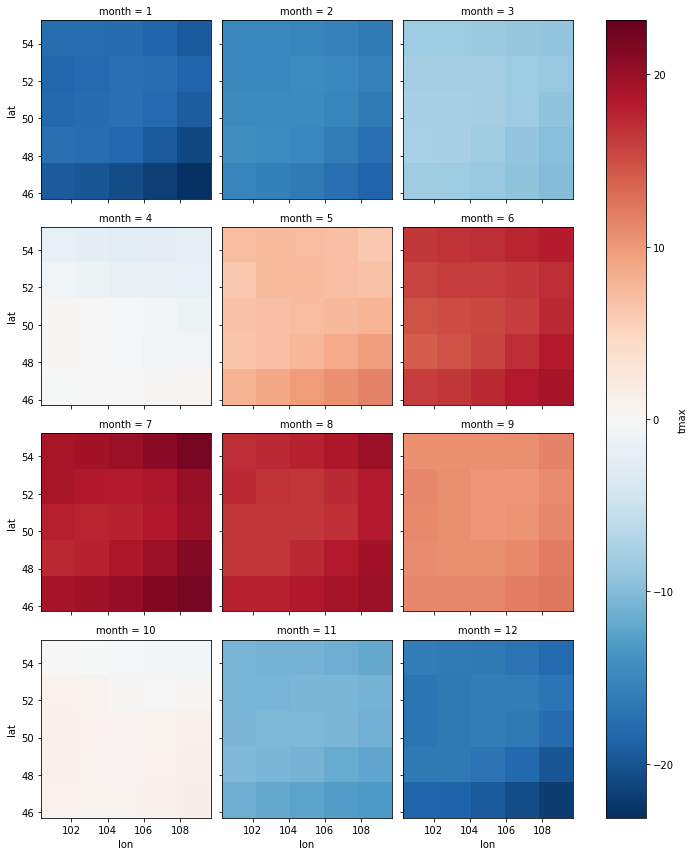

In [49]:
(data.tmax.groupby('time.month').mean() - data.tmax.mean('time')).plot(col='month', col_wrap=3)